# Tratamento de Dados de Satélite
**Equipe:** Daniel, Jones, Kleberson, Murilo

## Apresentação
### O Telescópio Kepler e a Descoberta de Exoplanetas

#### Introdução
- O Telescópio Espacial Kepler, lançado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
  ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
- A missão Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
planetários, contribuindo significativamente para a nossa compreensão do universo.

#### Objetivos da Missão Kepler
- **Exploração da Diversidade Planetária**: Investigar a variedade de planetas e suas características.
- **Identificação de Exoplanetas**: Detectar planetas em zonas habitáveis, onde a vida poderia existir.
- **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras missões da NASA e pesquisas científicas.

#### O Conjunto de Dados
- O conjunto de dados contém informações sobre aproximadamente **3.373 exoplanetas confirmados**.
- Inclui dados coletados durante as missões Kepler e K2, abrangendo vários anos de observação.
- **Informações Disponíveis**:
  - Nome da estrela hospedeira
  - Características dos planetas (tamanho, massa, composição)
  - Parâmetros orbitais (período orbital, distância da estrela)
  - Métodos de descoberta (transito, velocidade radial)
  - Propriedades estelares (tipo de estrela, temperatura)

#### Importância dos Dados
- Os dados do Kepler são cruciais para entender a formação e evolução dos sistemas planetários.
- Permitem a análise estatística da distribuição de exoplanetas em diferentes tipos de estrelas e suas características.
- A pesquisa com esses dados pode revelar padrões que ajudam a identificar quais sistemas planetários têm maior probabilidade de abrigar vida.



## Análise dos Dados

**Bibliotecas necessárias**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Resultados obtidos**

In [16]:
# 1) Lê o CSV para um DataFrame
df_pop = pd.read_csv('data/planets.csv')

# Suponha que a coluna que você quer checar se chama 'col_importante'

# 2) Máscara para filtrar os dados mantendo só as linhas onde 'col_importante' NÃO é NaN
mask = (
    (df_pop['pl_hostname'] != '') &
    (df_pop['pl_dens'].notna()) &
    (df_pop['pl_bmassj'] != '') &
    (df_pop['pl_radj'].notna()) &
    (df_pop['pl_orbper'].notna()) &
    (df_pop['st_teff'].notna())
)

"""
Alternativa usando dropna para as colunas numéricas e filtragem específica para as strings:

python

Copiar código
# 1) remove linhas com NaN nas colunas numéricas
df2 = df.dropna(subset=['pl_dens','pl_radj','pl_orbper','st_teff'])

# 2) filtra as colunas de string para não-vazias
mask_str = (df2['pl_hostname'].str.strip() != '') & (df2['pl_bmassj'].str.strip() != '')
df_filtrado = df2[mask_str]
Assim você garante que só sobram linhas em que todas as colunas que você listou estejam efetivamente preenchidas.
"""

df_filtrado = df_pop[mask]

# Alternativamente, você também pode "dropar" as linhas faltantes diretamente:
# df.dropna(subset=['col_importante'], inplace=True)

# 3) A partir daqui use df_filtrado para suas análises
print(df_filtrado.head(5))

    rowid pl_hostname pl_letter    pl_discmethod  pl_pnum  pl_orbper  \
26     27      55 Cnc         e  Radial Velocity        5   0.736539   
46     47   BD+20 594         b          Transit        1  41.685500   
60     61     CoRoT-1         b          Transit        1   1.508956   
61     62    CoRoT-10         b          Transit        1  13.240600   
62     63    CoRoT-11         b          Transit        1   2.994330   

    pl_orbpererr1  pl_orbpererr2  pl_orbperlim  pl_orbsmax  ...  st_masserr1  \
26       0.000007      -0.000007           0.0     0.01544  ...         0.01   
46       0.003000      -0.003100           0.0     0.24100  ...         0.03   
60       0.000006      -0.000006           0.0         NaN  ...         0.15   
61       0.000200      -0.000200           0.0     0.10550  ...         0.05   
62       0.000011      -0.000011           0.0     0.04360  ...         0.05   

    st_masserr2  st_masslim  st_massblend  st_rad  st_raderr1  st_raderr2  \
26       

### Proporções

**Planetas cujo raio se assemelha ao da Terra**

Como o raio de cada planeta está medido em **raios de júpiter**, faremos uma conversão do raio da Terra:

$R_{Terra} = 6378,1~km = \frac{6378,1}{69911} \approx 0,09123$ raios de júpiter

Cerca de 126 planetas possuem o raio semelhante ao da Terra!
Proporção dos planetas encontrados: 33.16%
Média do raio dos planetas: 0.0929683
Variância (amost.): 0.0000332
Desvio-padrão (amost.): 0.0057660


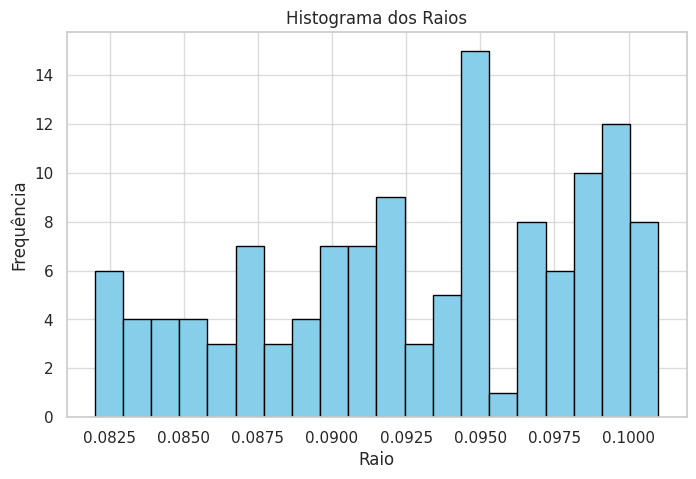

Proporção (planetas menores que a Terra): 38.89%
Proporção (planetas maiores que a Terra): 61.11%


In [93]:
# Parâmetros
coluna = "pl_radj"
x      = 0.09123     # valor alvo (float)
tol    = 0.01        # tolerância, ex.: ±0.01

mask_r = (df_pop[coluna] - x).abs() <= tol
df_r = df_pop[mask_r]

# Média
media = df_r[coluna].mean()

# Variância amostral
variancia_amostral = df_r[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_r[coluna].std(ddof=1)

print(f"Cerca de {len(df_r[coluna])} planetas possuem o raio semelhante ao da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_r)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média do raio dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")

serie = df_r[coluna]

# --- plotando histograma ---
plt.figure(figsize=(8, 5))

serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Raios")
plt.xlabel("Raio")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_r[coluna] < x).mean() * 100
print(f"Proporção (planetas menores que a Terra): {menores:.2f}%")
print(f"Proporção (planetas maiores que a Terra): {100 - menores:.2f}%")

**Planetas cujo a massa se assemelha ao da  Terra**

Como o massa de cada planeta também está medido em **raios de júpiter**, faremos uma conversão da massa da Terra:

$M_{Terra} = 5,9722 \cdot 10^{24}~kg = \frac{5,9722 \cdot 10^{24}}{1,898 \cdot 10^{27}} \approx 0,003147$ massas de júpiter

Cerca de 61 planetas possuem o raio semelhante ao da Terra!
Proporção dos planetas encontrados: 16.05%
Média do raio dos planetas: 0.0079669
Variância (amost.): 0.0000173
Desvio-padrão (amost.): 0.0041634


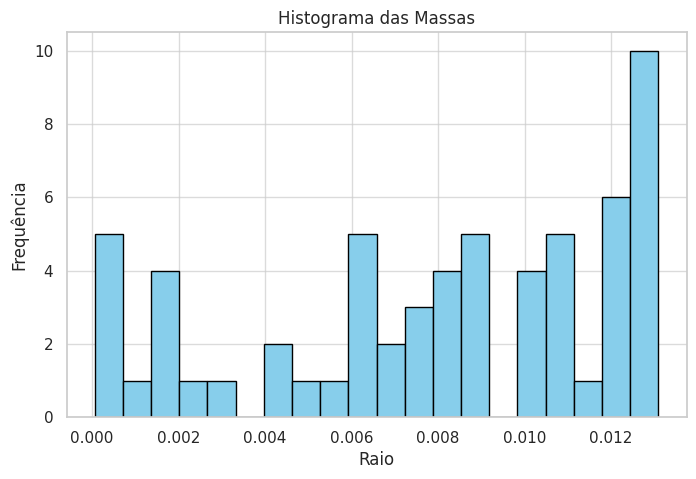

Proporção (planetas menos massivo que a Terra): 19.67%
Proporção (planetas mais massivo que a Terra): 80.33%


In [105]:
# Parâmetros
coluna = "pl_bmassj"
x      = 0.003147     # valor alvo (float)
tol    = 0.01       # tolerância, ex.: ±0.01

mask_r = (df_pop[coluna] - x).abs() <= tol
df_r = df_pop[mask_r]

# Média
media = df_r[coluna].mean()

# Variância amostral
variancia_amostral = df_r[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_r[coluna].std(ddof=1)

print(f"Cerca de {len(df_r[coluna])} planetas possuem o raio semelhante ao da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_r)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média do raio dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")

serie = df_r[coluna]

# --- plotando histograma ---
plt.figure(figsize=(8, 5))

serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Massas")
plt.xlabel("Raio")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_r[coluna] < x).mean() * 100
print(f"Proporção (planetas menos massivo que a Terra): {menores:.2f}%")
print(f"Proporção (planetas mais massivo que a Terra): {100 - menores:.2f}%")

## Conclusão
- O Telescópio Kepler revolucionou nossa compreensão dos exoplanetas e da diversidade dos sistemas planetários.
- O conjunto de dados disponível oferece uma rica fonte de informações para pesquisas futuras e análises estatísticas.
- Através do uso de ferramentas como Jupyter Notebooks, podemos explorar e visualizar esses dados, contribuindo para o avanço da astronomia e da astrobiologia.